# Deer Harvest - Total Harvest Review and Possible Associations with Chronic Wasting Disease

## Objectives
    - Compile data and observe state-wide trends on Total Deer Harvest
    - Map Year by Year Changes in Harvest Numbers
    - Map and Explore Chronic Wasting Disease relative to Deer Harvest
    

### Acquire Minnesota Basemap and import Libraries

In [1]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.simplefilter(action='ignore')


us_states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')
mn_state_boundary = us_states[us_states["STUSPS"].isin(["MN"])]


## Process all available yearly deer harvest data in Perpetual Permit Areas

The Minessota Geospatial Commons (https://gisdata.mn.gov/) has published Deer Harvest Data from 1993 to 2014.

One objective of this notebook is to compile all data available from 2009 onwards for Permit Areas that have not had their geographic boundaries altered (i.e. Perpetual Permit Areas). This will be an automated process and when years 2015 and later are released they can be downloaded and the notebook will automatically add them.

Note: Data before 2009 is not included in this process because Permit Area numbers, now designated as "kill blocks" were altered so we cannot automatically match them to post 2008 permit areas.

data source: https://gisdata.mn.gov/dataset/env-mn-deer-harvest

In [2]:
# Get Deer Permit Areas Shapefile from file
# note: starting in 2009 permit areas are referred to as kill blocks in MN DNR gis data
deer_permit_areas = gpd.read_file('data\deer_permit_areas.json')

# Collect all deer harvest shapefiles from directory and append to single geodataframe
# As new yearly data is released we can re-run the process
folder = Path("data\deer_harvest_shp")
shapefiles = folder.glob("*.shp")

for shp in shapefiles:
    year = str(shp)[-8:-4]
    if int(year) >= 2009:
        dh_year = gpd.read_file(shp)
        # Reduce dataset to only columns of interest, rename them with associated year
        dh_year_reduce = dh_year[['KILLBLOCK','TOTALHARV']]
        dh_year_reduce.columns = ['KILLBLOCK',f'TOTALHARV_{year}']
        deer_permit_areas = deer_permit_areas.merge(dh_year_reduce, on='KILLBLOCK')
    else:
        pass
deer_permit_areas.sample(3)

,ZONE_,ACRES,KILLBLOCK,geometry,TOTALHARV_2009,TOTALHARV_2010,TOTALHARV_2011,TOTALHARV_2012,TOTALHARV_2013,TOTALHARV_2014
105,2,328129.732778,263,"MULTIPOLYGON (((250934.677 5433053.182, 250908...",812,741,545,463,530,511
57,2,270009.253642,278,"MULTIPOLYGON (((251973.953 5013468.000, 252149...",702,819,715,550,658,583
28,1,431851.581366,183,"MULTIPOLYGON (((554805.388 5167502.647, 554803...",2194,2438,2504,2058,1972,1018


## Overview of Permit Areas
In the following chart and maps we can observe the total deer harvest for each available year.

<AxesSubplot:>

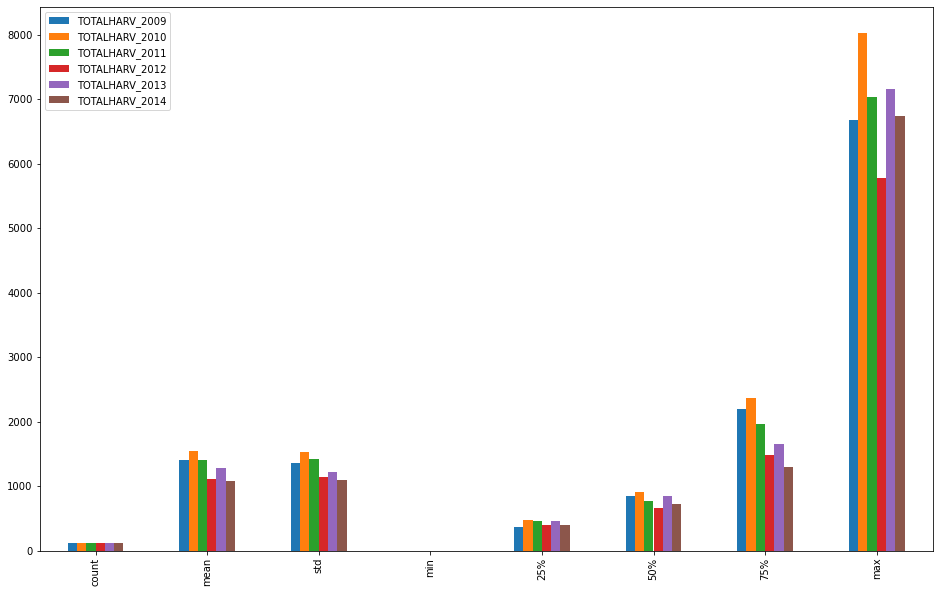

In [3]:
# General Statistics on total harvest data
deer_permit_areas[['TOTALHARV_2009','TOTALHARV_2010','TOTALHARV_2011','TOTALHARV_2012','TOTALHARV_2013','TOTALHARV_2014']].describe().plot.bar(figsize=(16, 10))

# View Maps at Relative Scale
Here we can take a look at maps for each year. The map colors are scaled for each individual year giving a sense of the full extent and geopgrahy of total deer harvest values.

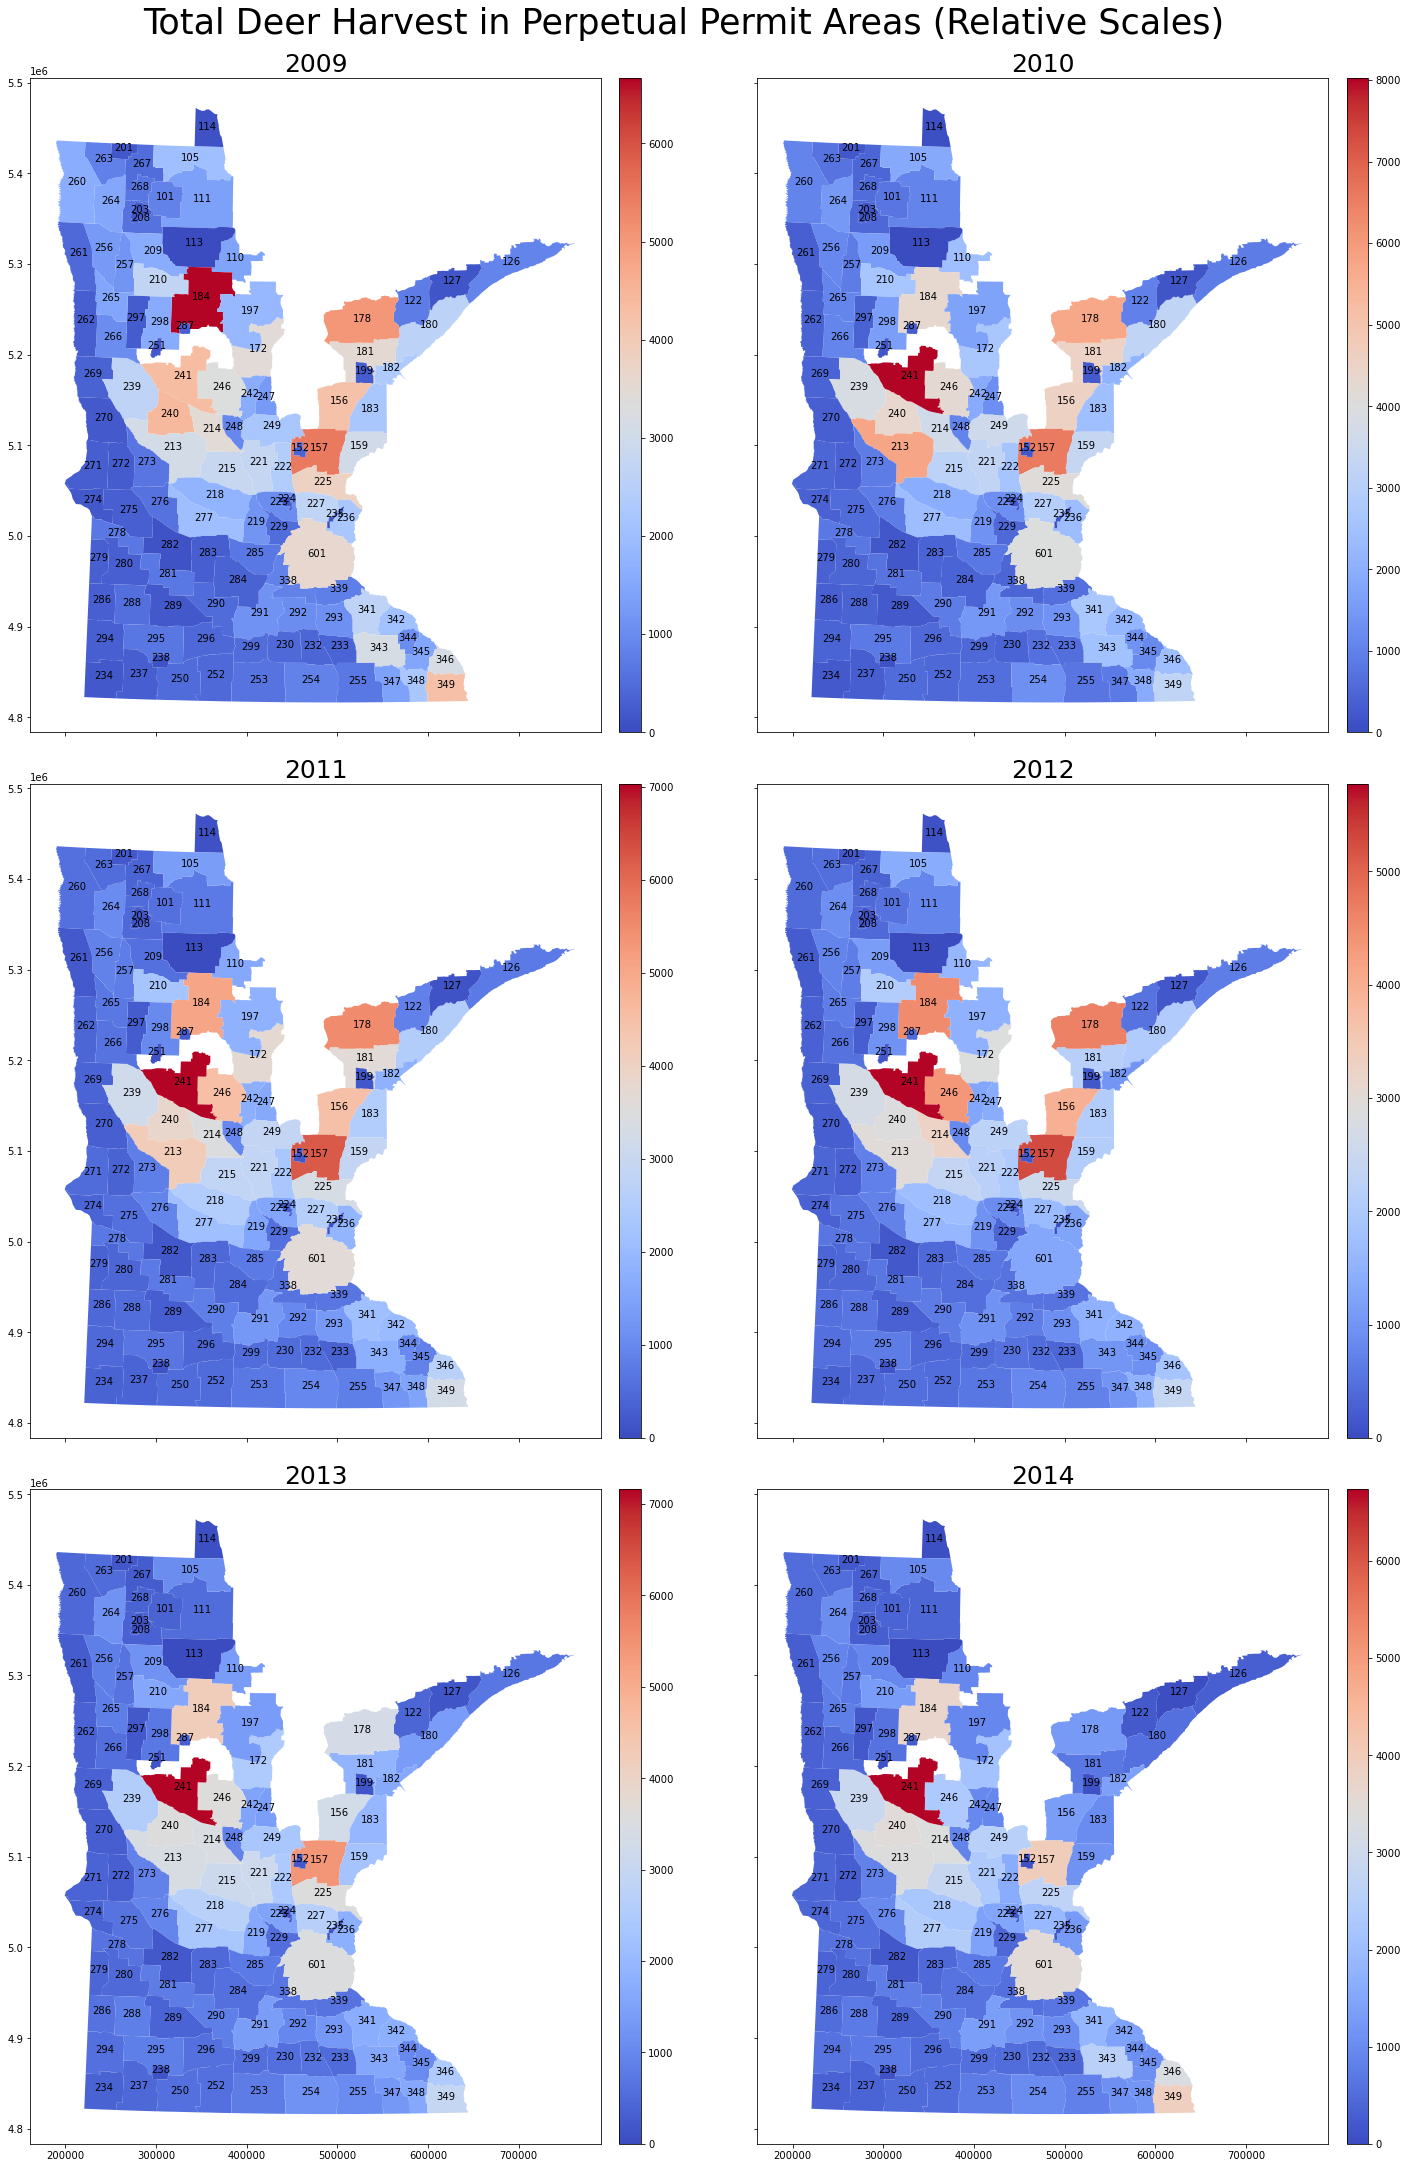

In [4]:
# Get all total harvest columns names to plot a map for each year
years = list(deer_permit_areas.columns[4:])

# Calculate number of rows needed to plot all years
plot_rows = int(str(len(years)/2).rstrip('.0'))

# Create plot for every year available up to 9 years.
fig, axes = plt.subplots(figsize=(20, 30), ncols=2, nrows=plot_rows,
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))

fig.suptitle('Total Deer Harvest in Perpetual Permit Areas (Relative Scales)', fontsize=35)

# Loop through up to 11 potential maps of Yearly Deer Harvest data
for idx, val in enumerate(years):
    if idx < 2:
        axes[0][idx].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[0][idx], column=years[idx], legend=True, cmap='coolwarm')
        deer_permit_areas.apply(lambda x: axes[0][idx].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 2 <= idx < 4:
        axes[1][idx-2].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[1][idx-2], column=years[idx], legend=True, cmap='coolwarm')
        deer_permit_areas.apply(lambda x: axes[1][idx-2].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 4 <= idx < 6:
        axes[2][idx-4].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[2][idx-4], column=years[idx], legend=True, cmap='coolwarm')
        deer_permit_areas.apply(lambda x: axes[2][idx-4].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 6 <= idx < 8:
        axes[2][idx-6].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[2][idx-6], column=years[idx], legend=True, cmap='coolwarm')
        deer_permit_areas.apply(lambda x: axes[2][idx-6].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 8 <= idx < 10:
        axes[3][idx-8].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[3][idx-8], column=years[idx], legend=True, cmap='coolwarm')
        deer_permit_areas.apply(lambda x: axes[3][idx-8].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 10 <= idx < 12:
        axes[3][idx-10].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[3][idx-10], column=years[idx], legend=True, cmap='coolwarm')
        deer_permit_areas.apply(lambda x: axes[3][idx-10].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.show()

# View Maps at Common Scale
Now that we have a sense of the different total harvest values year to year it may be more helpful to view the maps at a common scale.

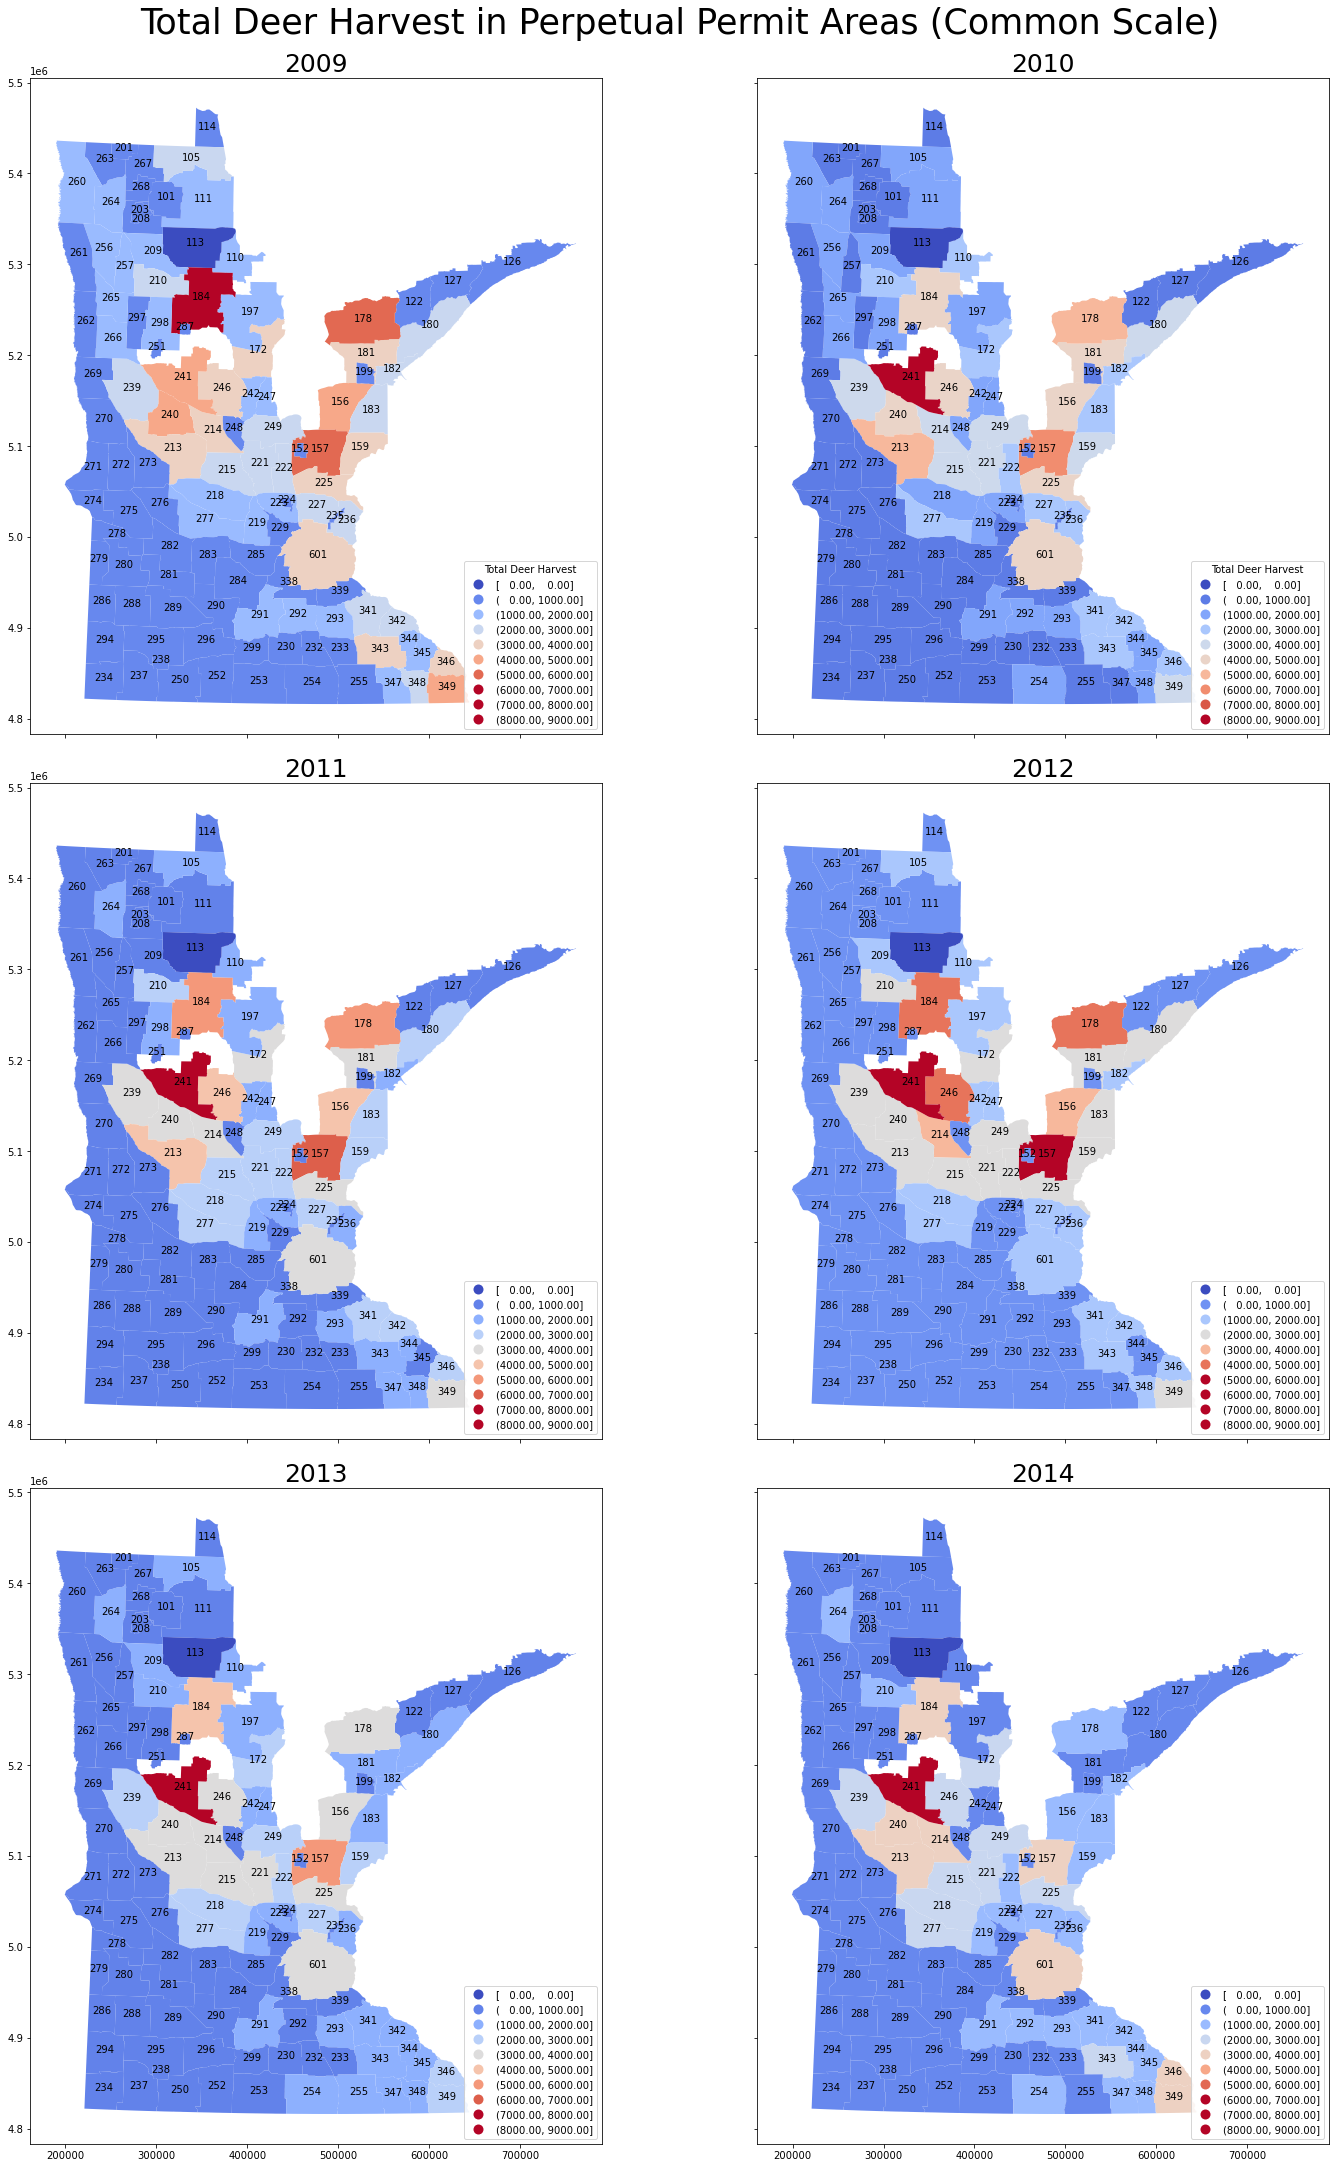

In [5]:
# Grab years and set up plot
years = list(deer_permit_areas.columns[4:])
plot_rows = int(str(len(years)/2).rstrip('.0'))
fig, axes = plt.subplots(figsize=(20, 30), ncols=2, nrows=plot_rows,
                        constrained_layout=True, 
                        sharex=True, sharey=True, 
                        subplot_kw=dict(aspect='equal'))

fig.suptitle('Total Deer Harvest in Perpetual Permit Areas (Common Scale)', fontsize=35)

class_breaks = dict(bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000])

# Loop through up to 11 potential maps of Yearly Deer Harvest data
for idx, val in enumerate(years):
    if idx < 2:
        axes[0][idx].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[0][idx], column=years[idx], legend=True,cmap='coolwarm',scheme="User_Defined",classification_kwds=class_breaks,legend_kwds={'loc': 'lower right','title': 'Total Deer Harvest','fontsize': 10})
        deer_permit_areas.apply(lambda x: axes[0][idx].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1) 
    elif 2 <= idx < 4:
        axes[1][idx-2].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[1][idx-2], column=years[idx], legend=True,cmap='coolwarm',scheme="User_Defined",classification_kwds=class_breaks,legend_kwds={'loc': 'lower right'})
        deer_permit_areas.apply(lambda x: axes[1][idx-2].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1) 
    elif 4 <= idx < 6:
        axes[2][idx-4].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[2][idx-4], column=years[idx], legend=True,cmap='coolwarm',scheme="User_Defined",classification_kwds=class_breaks,legend_kwds={'loc': 'lower right'})
        deer_permit_areas.apply(lambda x: axes[2][idx-4].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 6 <= idx < 8:
        axes[2][idx-6].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[2][idx-6], column=years[idx], legend=True,cmap='coolwarm',scheme="User_Defined",classification_kwds=class_breaks,legend_kwds={'loc': 'lower right'})
        deer_permit_areas.apply(lambda x: axes[2][idx-6].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 8 <= idx < 10:
        axes[3][idx-8].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[3][idx-8], column=years[idx], legend=True,cmap='coolwarm',scheme="User_Defined",classification_kwds=class_breaks,legend_kwds={'loc': 'lower right'})
        deer_permit_areas.apply(lambda x: axes[3][idx-8].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    elif 10 <= idx < 12:
        axes[3][idx-10].set_title(val[-4:], fontsize=25)
        deer_permit_areas.plot(ax=axes[3][idx-10], column=years[idx], legend=True,cmap='coolwarm',scheme="User_Defined",classification_kwds=class_breaks,legend_kwds={'loc': 'lower right'})
        deer_permit_areas.apply(lambda x: axes[3][idx-10].annotate(s=x.KILLBLOCK, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

plt.show()

# Permit Areas of Interest and Upcoming CWD Data
We can see from the maps that there is an area of high total harvest activity in the mid-north area of Minnesota. In particular Permit Area 241 has very high activity.

We will next be bringing in chronic wasting diease data and determing which Permit Area's CWD activity has been reported.

The CWD Data contains reported and confirmed cases of chronic wasting disease in Minnesota.

source: https://www.dnr.state.mn.us/cwdcheck/positive-deer-table.html

In [6]:
# Read in chronic wasting diesease data
mn_cwd = gpd.read_file('data/cwd_positive_deer_data.csv')
print(mn_cwd['year'])
mn_cwd.sample(3)


0      2010
1      2016
2      2016
3      2016
4      2017
       ... 
103    2020
104    2020
105    2020
106    2020
107    2020
Name: year, Length: 108, dtype: object


,year,sex,age,collection_method,sample_acquisition,outbreak,harvest_date,sample_date,permit_area,pls,geometry
88,2020,Female,Adult,Fall 2020,Hunter harvested,,9/30/2020,10/1/2020,646,T106 R07 S21,None
53,2019,Female,Yearling,2019 Fall Harvest,Hunter harvested,Fillmore,10/18/2019,10/20/2019,646,T104 R06 S03,None
35,2019,Female,Adult,Found Dead,Found dead,Fillmore,1/3/2019,1/3/2019,603,T103 R10 S20,None


# Exploring the CWD Data
This data set has 107 rows, meaning 107 confirmed cases of chronic waste disease. This dataset also is fairly recent, we see many values with years after 2016 so there may not be much line up with the deer harvest zones we have because as we saw there was only spatial data available from the Minessota Geospatial Commons until 2014.

In [7]:
# This .csv does not have data types assigned to the columns, I need to make the permit area an int
mn_cwd['permit_area'] = pd.to_numeric(mn_cwd['permit_area'])
mn_cwd = mn_cwd[mn_cwd['permit_area'].notna()]
mn_cwd.permit_area = mn_cwd.permit_area.astype(int)

In [8]:
# Join the CWD Data to a new base copy of Permit Areas we have been working with
mn_cwd.rename({'permit_area': 'KILLBLOCK'}, axis=1, inplace=True)

deer_permit_areas_base = gpd.read_file('data\deer_permit_areas.json')

# Merge and remove any rows with empty sample_dates, these would be rows that do not
# join to any of our availabe permit zones
deer_permit_areas_base = deer_permit_areas_base.merge(mn_cwd, on='KILLBLOCK')
deer_permit_areas_base = deer_permit_areas_base[deer_permit_areas_base['sample_date'].notna()]
# 
deer_permit_areas_base[['KILLBLOCK','year','sex','age','collection_method','sample_acquisition','outbreak','harvest_date','sample_date']]
# deer_permit_areas_base.describe

,KILLBLOCK,year,sex,age,collection_method,sample_acquisition,outbreak,harvest_date,sample_date
0,247,2019,Female,Adult,Found Dead,Found dead,Crow Wing,1/22/2019,1/22/2019
1,339,2020,Male,Adult,Reported Sick,Reported sick,,3/1/2020,3/1/2020
2,343,2010,Female,Adult,2010 Firearms season,Hunter harvested,Olmsted,11/27/2010,11/27/2010
3,346,2018,Male,Adult,2018 Fall Hunter Harvest,Hunter harvested,Houston/Winona,11/16/2018,11/16/2018
4,346,2019,Male,Adult,2019 Agency Culled,Agency culled,Houston/Winona,3/11/2019,3/12/2019
5,346,2019,Female,Adult,2019 Agency Culled,Agency culled,Houston/Winona,3/26/2019,3/27/2019
6,347,2018,Male,Adult,2018 Fall Hunter Harvest,Hunter harvested,Fillmore,11/2/2018,11/3/2018
7,348,2016,Male,Adult,2016 Firearms season,Hunter harvested,Fillmore,11/5/2016,11/5/2016
8,348,2016,Male,Yearling,2016 Firearms season,Hunter harvested,Fillmore,11/11/2016,11/12/2016
9,348,2016,Male,Adult,2016 Firearms season thru Taxidermist,Hunter harvested,Fillmore,11/18/2016,12/5/2016


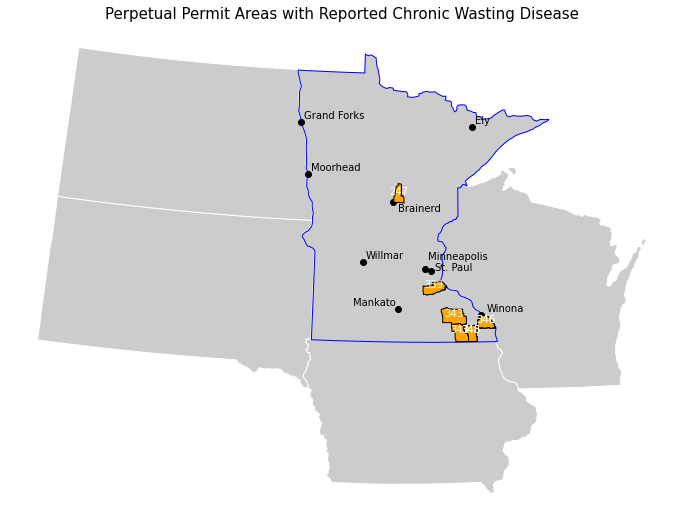

In [9]:
# Plotting known Permit Areas with reports of Chronic Wasting Disease
deer_permit_area_cwd = deer_permit_areas_base.set_geometry('geometry_x')
cities = gpd.read_file('data/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp')
cities.to_crs(epsg=26915,inplace=True)
mn_state_boundary.to_crs(epsg=26915,inplace=True)
mn_cities = gpd.clip(cities,mn_state_boundary)
mn_cities = mn_cities[mn_cities["name"].isin(["Minneapolis", "Grand Forks", "St. Paul", "Willmar", "Mankato", "Moorhead", "Ely", "Deluth", "Brainerd", "Winona"])]

mn_nearby_state_boundary = us_states[us_states["STUSPS"].isin(["MN", "ND", "SD", "NB", "IA", "WI"])]
mn_nearby_state_boundary.to_crs(epsg=26915, inplace=True)

fig, ax = plt.subplots(figsize=(12, 12))
cities_plot = mn_cities.plot(ax=ax, color='black', zorder=3)
deer_permit_area_cwd.plot(ax=ax, edgecolor='black', color='orange', zorder=3)
mn_state_boundary.plot(ax=ax, edgecolor='blue', color='#cccccc', zorder=2)
mn_nearby_state_boundary.plot(ax=ax, edgecolor='white', color='#cccccc', zorder=1)

ax.set_title(f"Perpetual Permit Areas with Reported Chronic Wasting Disease", fontsize=15)
ax.set_axis_off()

for x, y, label in zip(mn_cities.geometry.x, mn_cities.geometry.y, mn_cities.name):
    x_label_offset = 3
    y_label_offset = 3
    if label == 'Minneapolis':
        x_label_offset = 3
        y_label_offset = 10
    elif label == 'St. Paul':
        x_label_offset = 4
        y_label_offset = 0
    elif label == 'Mankato':
        x_label_offset = -45
        y_label_offset = 3
    elif label == 'Rochester':
        x_label_offset = -30
        y_label_offset = 3
    elif label == 'Winona':
        x_label_offset = 5
        y_label_offset = 3
    elif label == 'Brainerd':
        x_label_offset = 5
        y_label_offset = -10
    else:
        pass
    ax.annotate(label, xy=(x, y), xytext=(x_label_offset, y_label_offset), textcoords="offset points") 

deer_permit_area_cwd.apply(lambda x: ax.annotate(s=x.KILLBLOCK, xy=x.geometry_x.centroid.coords[0], ha='center', color='white',fontsize=10),axis=1)

plt.show()

## Final Observations on CWD Data

There are only 9 observations that join with the Permit Areas (aka Killblocks) we have been working with. It turns out most of the data for CWD is more recent and is within Permit Areas that were recently created, that's why they don't join here with the permit areas we have been looking at.

We can see from the map that Permit Areas 247,339,342,347 and 348 have had reports of CWD.

Even though the data is limited, it is valuable to have, and can be referenced on the web map.

In [18]:
# Save map data to map directory for rendering in web map
# Convert to CRS 4326 for web mapping
deer_permit_areas.to_crs(epsg=4326,inplace=True)
deer_permit_area_cwd.to_crs(epsg=4326,inplace=True)

with open('../map/data/deer_harvest_all_years.json', 'w') as f:
    f.write(deer_permit_areas.to_json())
    
with open('../map/data/deer_permit_area_cwd.json', 'w') as f:
    f.write(deer_permit_area_cwd.to_json())